In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import fnmatch
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from sklearn.manifold import TSNE
import json

In [2]:
path = 'F:\Music_Notes'

In [3]:
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d .wav files in %s"%(len(files),path))

found 50 .wav files in F:\Music_Notes


In [4]:
def get_features(y, sr):
    y = y[0:sr]
    S = librosa.feature.melspectrogram(y,sr=sr, n_mels=128)
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc, mode='nearest')
    delta2_mfcc = librosa.feature.delta(mfcc, order=2, mode='nearest')
    feature_vector = np.concatenate((np.mean(mfcc,1), np.mean(delta_mfcc,1), np.mean(delta2_mfcc,1)))
    feature_vector = (feature_vector-np.mean(feature_vector)) / np.std(feature_vector)
    return feature_vector

In [5]:
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
   # if i % 100 == 0:  this was because there were 6000 sounds in original dataset and printing every single is lengthy
    print("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f)
        if len(y) < 2:
            print("error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except:
        print("error loading %s" % f)
        
print("calculated %d feature vectors"%len(feature_vectors))

get 1 of 50 = F:\Music_Notes\072_the-mystery-begins-guitar-space.wav
get 2 of 50 = F:\Music_Notes\074_acoustic-guitar-strummy1.wav
get 3 of 50 = F:\Music_Notes\074_acoustic-guitar-strummy2.wav
get 4 of 50 = F:\Music_Notes\075_coal-mine-guitar-part.wav
get 5 of 50 = F:\Music_Notes\079_bright-leady-guitar.wav
get 6 of 50 = F:\Music_Notes\080_country-boy-slide-guitar.wav
get 7 of 50 = F:\Music_Notes\080_country-boy-slide-guitar2.wav
get 8 of 50 = F:\Music_Notes\081_deeply-crunchy-guitar-stutter-funk.wav
get 9 of 50 = F:\Music_Notes\084_lone-wolf-guitar-strut.wav
get 10 of 50 = F:\Music_Notes\085_fretless-dulcimer.wav
get 11 of 50 = F:\Music_Notes\089_backwards-acoustic-guitar-looper.wav
get 12 of 50 = F:\Music_Notes\090_flangy-guitar-picked-melody.wav
get 13 of 50 = F:\Music_Notes\090_flangy-guitar-strummed-melody.wav
get 14 of 50 = F:\Music_Notes\A.wav
get 15 of 50 = F:\Music_Notes\A_Drum.wav
get 16 of 50 = F:\Music_Notes\B.wav
get 17 of 50 = F:\Music_Notes\Bb.wav
get 18 of 50 = F:\Music

In [6]:
model = TSNE(n_components=2, learning_rate=150, perplexity=2, verbose=2, angle=0.1).fit_transform(feature_vectors)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 0.051435
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 68.1833344, gradient norm = 0.4583381 (50 iterations in 0.035s)
[t-SNE] Iteration 100: error = 79.2631073, gradient norm = 0.4921356 (50 iterations in 0.020s)
[t-SNE] Iteration 150: error = 66.9165192, gradient norm = 0.4474307 (50 iterations in 0.022s)
[t-SNE] Iteration 200: error = 67.6687469, gradient norm = 0.3057889 (50 iterations in 0.020s)
[t-SNE] Iteration 250: error = 68.3357162, gradient norm = 0.3334756 (50 iterations in 0.020s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.335716
[t-SNE] Iteration 300: error = 1.6742615, gradient norm = 0.0098323 (50 iterations in 0.023s)
[t-SNE] Iteration 350: error = 1.2935878, gradient norm = 0.0019825 (50 it

In [7]:
print(files[0])

F:\Music_Notes\072_the-mystery-begins-guitar-space.wav


In [8]:
n = len(feature_vectors)
names = [None]*n
i = 0
for note in files:
    spl = note.split("\\")
    x = spl[2].split(".")
    names[i] = x[0]
    i+=1
print(names)

['072_the-mystery-begins-guitar-space', '074_acoustic-guitar-strummy1', '074_acoustic-guitar-strummy2', '075_coal-mine-guitar-part', '079_bright-leady-guitar', '080_country-boy-slide-guitar', '080_country-boy-slide-guitar2', '081_deeply-crunchy-guitar-stutter-funk', '084_lone-wolf-guitar-strut', '085_fretless-dulcimer', '089_backwards-acoustic-guitar-looper', '090_flangy-guitar-picked-melody', '090_flangy-guitar-strummed-melody', 'A', 'A_Drum', 'B', 'Bb', 'Bb_Drum', 'B_Drum', 'C', 'C1', 'C1_Drum', 'cello', 'Cq1_Drum', 'Cq_Drum', 'C_Drum', 'C_s', 'C_s1', 'D', 'D1', 'D1_Drum', 'Dq1_Drum', 'Dq_Drum', 'D_Drum', 'D_s', 'D_s1', 'E', 'E1', 'E1_Drum', 'E_Drum', 'F', 'F1', 'F1_Drum', 'Fq_Drum', 'F_Drum', 'F_s', 'G', 'Gq_Drum', 'G_Drum', 'G_s']


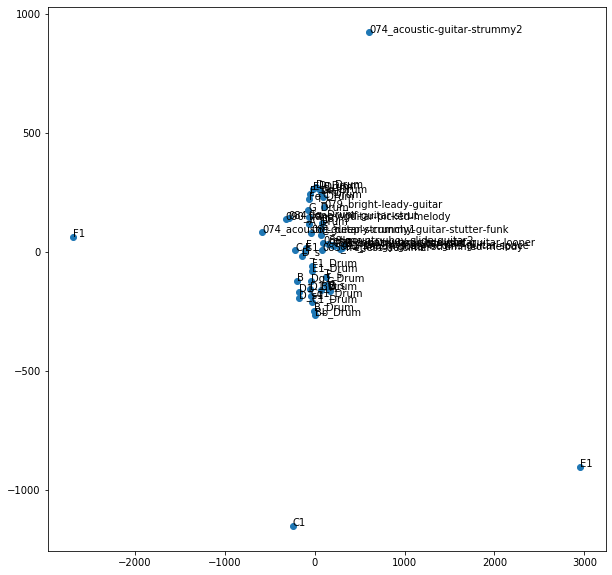

In [9]:
x_axis=model[:,0]
y_axis=model[:,1]
plt.figure(figsize = (10,10))
plt.scatter(x_axis, y_axis)
for i, txt in enumerate(names):
    plt.annotate(txt, (x_axis[i], y_axis[i]))
plt.show()

In [10]:
print(len(x_axis))
print(x_axis)

50
[  302.14282    -584.2493      609.1324      214.93134     108.13094
   193.1788       92.90615     -39.081684   -289.75055      80.91839
   325.8628     -322.50433     278.22568     170.48799     -60.157467
  -200.79633      67.79083       6.7999287   -10.239236     76.195404
  -242.53395     -33.561195    153.12384     -42.24741      71.37221
    92.698265     75.069496   -217.25795      77.3357     -172.09914
   -47.17434     -45.76809      15.6583605    44.363083   -134.93224
  -171.61058    -109.55703    2954.4253      -33.68734     -17.485203
   -91.68493   -2685.8254      -25.647875    -62.928978    -47.307877
   122.81283     127.337105    -67.520325    -70.28846     148.74167  ]


In [11]:
from matplotlib.widgets import Button

<IPython.core.display.Javascript object>


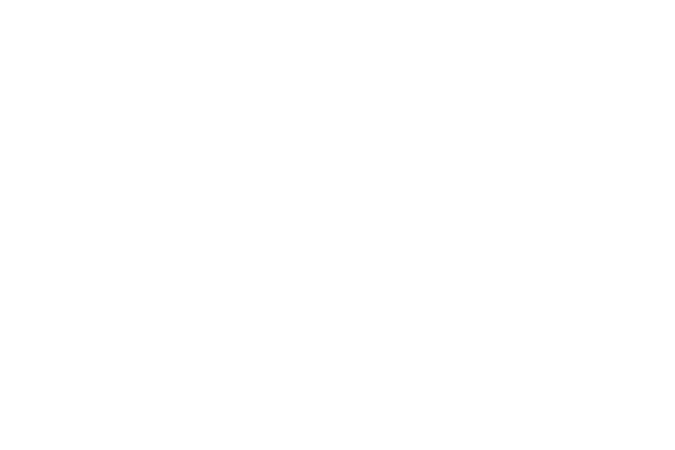

<IPython.core.display.Javascript object>


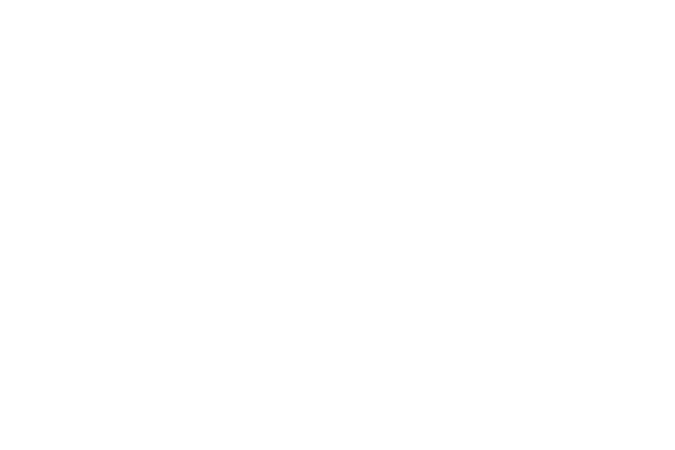

In [12]:
import winsound
import matplotlib.pyplot as plt
%matplotlib nbagg
import numpy as np; np.random.seed(1)
import mpld3
x = x_axis
y = y_axis

names = np.array(names)
c = np.random.randint(1,5,size=50)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c,s=30, cmap=cmap, norm=norm)
ax.set_facecolor("black")

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            winsound.PlaySound(sound_paths[ind["ind"][0]], winsound.SND_ASYNC | winsound.SND_ALIAS )
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                winsound.PlaySound(None, winsound.SND_ASYNC)
                fig.canvas.draw_idle()



fig.canvas.mpl_connect("motion_notify_event", hover)

import plotly.graph_objects as go
f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])
scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    print("hell yes")
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s

scatter.on_click(update_point)
plt.show()

In [45]:
from bokeh.models import ColumnDataSource, OpenURL, TapTool
from bokeh.plotting import figure, output_file, show
from bokeh.models import CustomJSHover

from math import sin
from random import random

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform

from bokeh import events
from bokeh.io import output_file, show
from bokeh.layouts import column, row
from bokeh.models import Button, CustomJS, Div

from bokeh.events import Tap
from bokeh.models.callbacks import CustomJS

output_file("openurl.html")

source = ColumnDataSource(data=dict(
    x=x,
    y=y,
    label = names,
    spath = files,
    color=["navy", "orange", "olive", "firebrick", "gold","navy", "orange", "olive", "firebrick", "gold","navy", "orange", "olive", "firebrick", "gold","navy", "orange", "olive", "firebrick", "gold","navy", "orange", "olive", "firebrick", "gold","navy", "orange", "olive", "firebrick", "gold","navy", "orange", "olive", "firebrick", "gold","navy", "orange", "olive", "firebrick", "gold","navy", "orange", "olive", "firebrick", "gold","navy", "orange", "olive", "firebrick", "gold"]
    ))
i = 4;
#for a datapoint information
TOOLTIPS = """
    <div>
        <div style = "display : none">
            <audio controls autoplay>
              <source src= @spath>
            </audio>
        </div>
        <div>
            <span id="song_index" style="font-size: 15px; color: #966;">$index</span>
            <span style="font-size: 17px; font-weight: bold;">@label</span>
        </div>
    </div>
"""

hover = HoverTool(tooltips=TOOLTIPS, show_arrow=False)
fig = figure(plot_width=1200, plot_height=700,
           tools= [hover], title="Click the Dots")
fig.grid.grid_line_color = None
fig.circle('x', 'y', color='color', size=10, source=source)

def display_event(div,attributes=[], style = 'float:left;clear:left;font_size=13px'):
    "Build a suitable CustomJS to display the current event in the div model."
    return CustomJS(args=dict(div=div,s2=s2,source=source), code="""
        var attrs = %s; var args = [];
        var tune_list = s2.data['tune'];
        var indx = parseInt(document.getElementById("song_index").innerHTML);
        var fsong = source.data['spath'];
        for (var i = 0; i<attrs.length; i++) {
            args.push(attrs[i] + '=' + Number(cb_obj[attrs[i]]).toFixed(2));
        }
        var line = "<span style=%r><b>" + cb_obj.event_name + "</b>(" + args.join(", ") + ")</span>\\n";
        var z = cb_obj.event_name;
        if(z == "tap")
           tune_list.push(fsong[indx]);
        if(tune_list.length == 5){
            line = line + "play the fukin song";
        }
        var text = div.text.concat(line);
        var lines = text.split("\\n")
        if (lines.length > 35)
            lines.shift();
        div.text = lines.join("\\n")  + tune_list + " length = "+tune_list.length;
        s2.change.emit();
    """ % (attributes,style))

def play_song(div):
    "Build a suitable CustomJS to display the current event in the div model."
    return CustomJS(args=dict(div=div,s2=s2), code="""
        var list_song = s2.data['tune'];
        div.text = "yo";
        //var audio = new Audio('F:\Music_Notes\089_backwards-acoustic-guitar-looper.wav');
    """) 

tune = []
s2 = ColumnDataSource(data=dict(tune = tune))

div = Div(width=400, height=fig.plot_height, height_policy="fixed")
div2 = Div(width=100, height=70, height_policy="fixed")
button = Button(label="Play the tune", button_type="success")
layout = column(button, row(fig, div))

## Events with no attributes
button.js_on_event(events.ButtonClick, play_song(div)) # Button click
fig.js_on_event(events.LODStart, display_event(div))         # Start of LOD display
fig.js_on_event(events.LODEnd, display_event(div))           # End of LOD display

## Events with attributes
point_attributes = ['x', 'y', 'sx', 'sy']                  # Point events
pan_attributes = point_attributes + ['delta_x', 'delta_y'] # Pan event

point_events = [events.Tap,]

for event in point_events:
    fig.js_on_event(event, display_event(div,attributes = point_attributes))

fig.js_on_event(events.Pan, display_event(div, attributes=pan_attributes))

#url = "http://www.colors.commutercreative.com/@color/"
#taptool = fig.select(type=TapTool)
#taptool.callback = OpenURL(url=url)

show(layout)                                    #shows you the visualization

In [ ]:
for(var song : list_song){
         div.text += song + "\n";
        }